In [4]:
library(tidyverse)
library(repr)
source("cleanup.R")
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [6]:
players <- read_csv("players.csv") |>
select(-hashedEmail, -name) |>
filter(!is.na(Age))|>
subset(played_hours != 0)
players

summary(players$Age)
summary(players$played_hours)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Veteran,TRUE,1.6,Female,23
Beginner,TRUE,1.5,Female,25
Amateur,TRUE,0.2,Male,22
Amateur,TRUE,48.4,Female,17


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0    17.0    20.0    21.3    23.0    58.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.10    0.10    0.50   10.51    1.80  223.10 

# 1. Data Description:
*note that the summary statistics will be included at the bottom as well as in the written report*

The dataset I will be using for my report is the players.csv dataset as I am going to be answering questions about how we can predict what kinds of players are most likely to contribute more data. In the original players.csv dataset, there are 196 rows and 7 columns, however after tidying the data there are 109 rows and 5 columns. The tidying that was performed on the dataset included removing any NA's from the Age category and removing any players that have 0 hours on Minecraft. The mean age is 21.3 years old with the minimum being 9 years old and the maximum being 58 years old. The mean hours played is 10.51 hours with the lowest amount of hours being 0.10 and the most amount of hours being 223.10 hours. In the origial dataset, there are 7 variables. 5 categorical variables which are experience, hashed email, name, gender, and if they are subscribed to the newsletter (subscribe). The other 2 variables are numerical which are played hours and age. The experience variable describes each persons perceived experience with the game, if they have a lot of hours they are likely going to consider themselves more of a "Pro". This creates an issue because perceived skill might not directly relate to how many hours they have played on the game. The subscribe variable is whether or not the player is subscribed to the game related newsletter. This can indicate how interested a person is in Minecraft and could relate to their played hours. The played hours is how many hours the player has spent playing Minecraft, a high amount of hours played will likely reflect a "dedicated" player. The gender variable is what gender each player identifies as. The age variable is how old the player is. 


| Variable | Mean | Minumum | Maximum | Median |
| -------  | ---- | ------- | ------- | ------ | 
| Age (Years)      | 21.3 | 9.00 | 58.00 | 20.00 |
| Played Hours (Hours) | 10.51 | 0.10 | 223.10 | 0.50 |
|

# 2. Questions

The broad question I will be addressing is **"What "kind" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts"**. This means that I will be trying to find out what variables can predict the amount of played hours.  

The specific question that I have formulated is **"Can the characteristics of players such as expereince, age and gender predict the total amount fo time spent playing Minecraft in the players dataset?"**

By looking at how the predictor variables relate to the amount of hours played per person, we can determine if there are any sort of patterns which can help us predict a players total time playing minecraft based on their characteristics. 

Before using any sort of predictive model, the players.csv dataset needs to be modified so that it is suitable to go through any model. I have already removed variables that I deemed not relevant to the question. However, the categorical variables need to be converted into factors so that they can be put into a predictive model as well. 

# 3. Exploratory Data Analysis & Visualization
*note that the dataset loading, dataset wrangling and mean calculation were all performed above so this section will only be performing exploratory visualizations*

To get a better understanding of the data, there are a variety of plots that can be made. I will be using barplots to demonstrate the relationship between played hours and different categorical variables in the players dataset. 

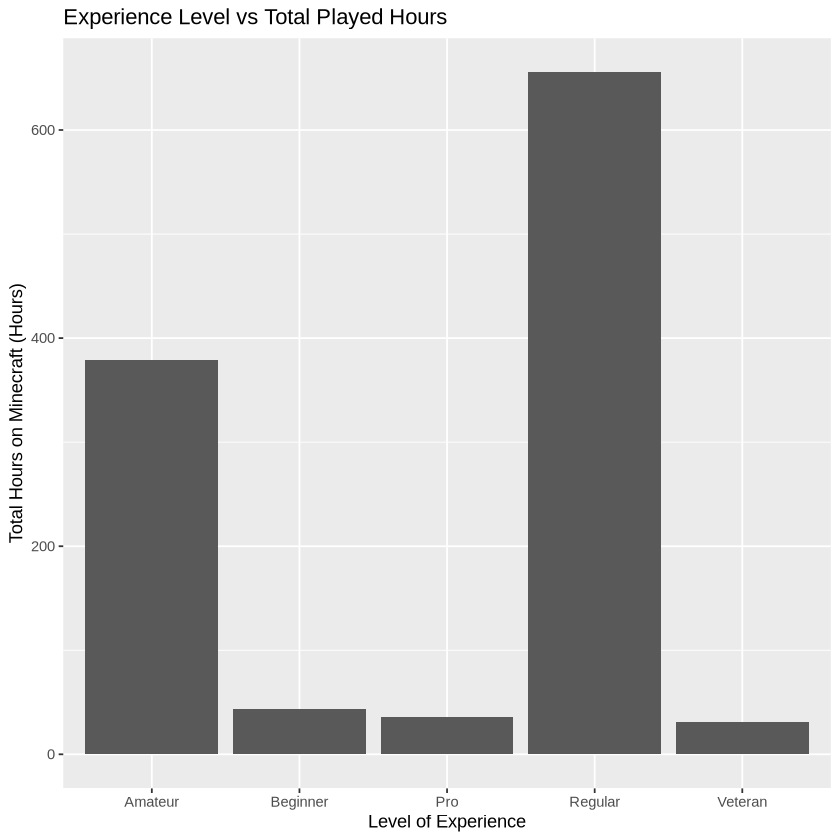

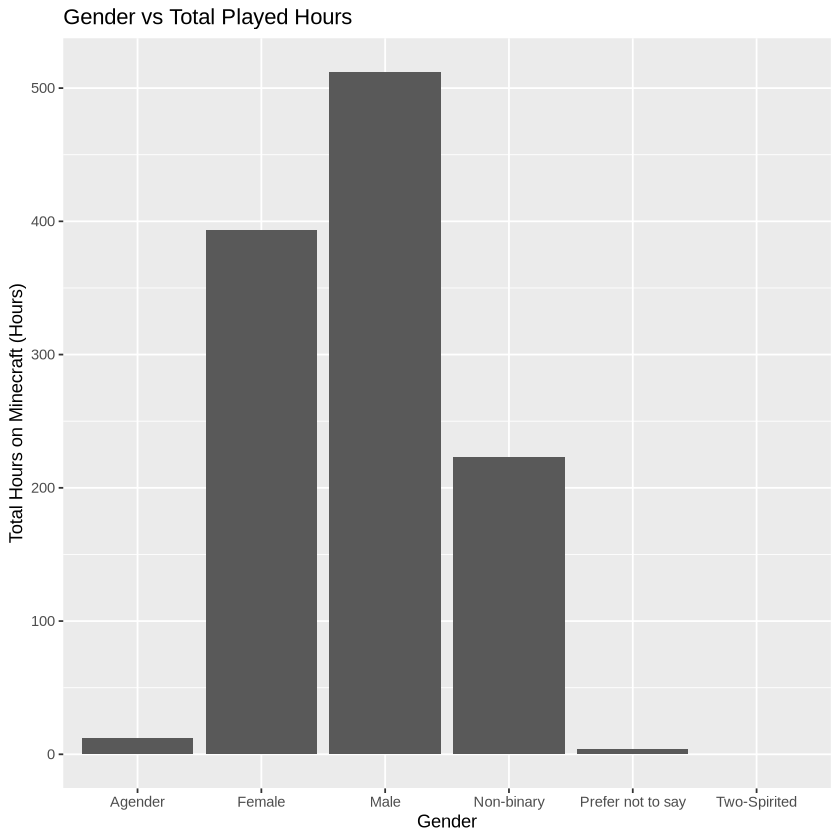

In [7]:
# Barplot that illustrates the relationship between experience and played hours
experience_vs_hours <- players |>
ggplot(aes(x = experience, y = played_hours)) + 
geom_bar(stat = "identity") +
labs(
    title = "Experience Level vs Total Played Hours", 
    x = "Level of Experience", 
    y = "Total Hours on Minecraft (Hours)") 


# Barplot that illustrates the relationship between gender and played hours
gender_vs_hours <- players |>
ggplot(aes(x = gender, y = played_hours)) +
geom_bar(stat = "identity") +
labs(
    title = "Gender vs Total Played Hours", 
    x = "Gender", 
    y = "Total Hours on Minecraft (Hours)")

experience_vs_hours
gender_vs_hours

### Experience vs Hours
In the first graph (experience vs hours), we can see that most of the total hours that contribute to Minecraft's game data is from the Regular experience level. The least amount of hours contributed comes from the Pro and Veteran experience levels. This shows that Regular experience levels play Minecraft the most compared to the other experience levels. '


### Gender vs Hours
In the second graph (gender vs hours), we can see that the majority of the hours on Minecraft come from Males. The least amount of hours contribute come from the Two-Spirited and "Prefer not to say" group. This shows that males play Minecraft more than the other genders. 

# 4. Methods and Plan

For my analysis, I plan to use a multiple linear regression to address my question of “can the characteristics of players such as experience, age and gender predict the total amount of time spent playing Minecraft in the players.csv dataset?”  

Linear regression is the most appropriate method to predict played hours due to the fact that the goal is to assess how multiple explanatory variables predict it. Linear regression is also known to be more reliable compared to KNN regression when it comes to larger data sets. 

To apply the linear regression method, there are a few assumptions that are required. The relationship between each explanatory variable and the response variable must be close to linear. The predictor variables must also have a meaningful association with the response variable, meaning that they provide useful information in predicting a change in the response.  

One limitation of the linear regression method is that the presence of outliers can influence the line of best fit. An outlier that deviates very far from the data can create a less accurate line of best fit. However, if the dataset is large enough, a few large outliers will not negatively impact the line of best fit very much. In a multiple linear regression, if the predictors are strongly linearly related, multicollinearity can occur. This can make it difficult for the model to differentiate between the individual effects of each of the predictor variables on the response variable.

To select the best model, I will use RMSE to asses the performance of each model. Since RMSE measures prediction error, the model that produces the lowest RMSE value will indicate a higher accuracy.

In order to process the model, the data needs to be tidied so that all the variables are in a usable format. This includes removing irrelevant variables and removing any NA values. Categorical variables will also need to be converted into a factor. The dataset will be split into a training and testing set. The training set will be 80% and will help to tune the model. The testing set will be the remaining 20% and will be used to evaluate the predictive performance on data that is unseen. 